#### This function is useful to plot the results of history=model.fit(....) in tensorflow
#### if the model is compiled with metrics=['accuracy'] this function wil produce
#### two side by side plots. The left plot shows the training and validation loss versus epochs
#### The right plot shows training and validation accuracy versus epochs
#### For the loss plot a blue dot appears on the plot of validation loss at the point of the lowest loss
#### For the accuracy plot a blue dot appears on the validation accuracy at the point of highest accuracy

#### import need modules

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np

In [2]:
def tr_plot(history):
    # set figue size and style
    plt.style.use('fivethirtyeight') 
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))      
    #Get the metric loss and accuracy values
    tacc=history.history['accuracy']
    tloss=history.history['loss']
    vacc=history.history['val_accuracy']
    vloss=history.history['val_loss']
    vloss_index=np.argmin(vloss) # index for the lowest validation loss
    vacc_index=np.argmax(vacc)   # index for the highest validation accuracy
    # define labels to mark best epoch for validation loss and accuracy
    vloss_label='best_epoch= ' + str(vloss_index + 1)
    vacc_label='best_epoch= ' + str(vacc_index + 1)
    # fill Epochs list
    Epochs=[]
    for i in range (len(tacc)):
        Epochs.append(i+1)
    # make the left most plot of training and validation loss
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(vloss_index + 1 ,vloss[vloss_index], s=150, c= 'blue', label=vloss_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    # make the right most plot of training and validation accuracy
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(vacc_index+1 , vacc[vacc_index], s=150, c= 'blue', label=vacc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout
    plt.show()

#### make some synthetic data to show as the plot

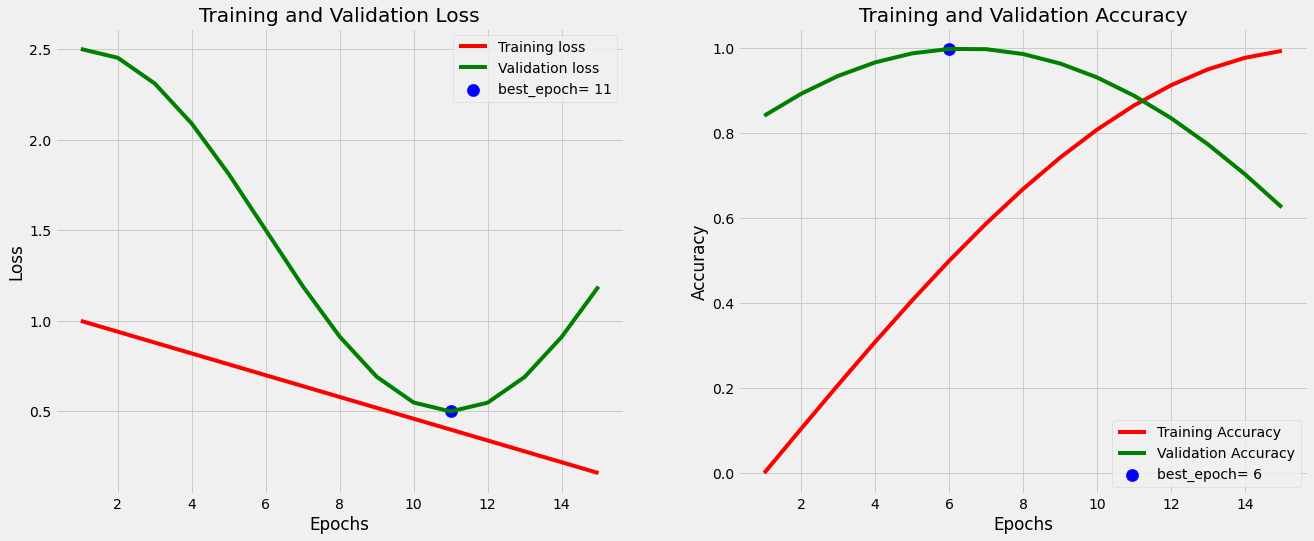

In [11]:
import math
tr_acc=[]
tr_loss=[]
v_acc=[]
v_loss=[]
for i in range (15):
    degree=90/15 * i
    rads =6.28 * degree/360
    tr_loss.append(1-degree * .01)
    v_loss.append(1.5 + math.cos(rads * 3))
    tr_acc.append(math.sin(rads))
    v_acc.append(math.sin(rads + 1.0))
# define a history class
class history:
    def __init__(self, tr_acc, v_acc, tr_loss, v_loss):
        self.tr_acc=tr_acc
        self.v_acc=v_acc
        self.tr_loss=tr_loss
        self.v_loss=v_loss
        # create the history.history attribute
        history.history={'accuracy':self.tr_acc, 'loss': self.tr_loss, 'val_accuracy': self.v_acc, 'val_loss':self.v_loss}
        
history=history(tr_acc, v_acc, tr_loss, v_loss) # instantiate the history object

tr_plot(history)